### Exemplo: No nosso caso, vamos ver a performance de uma carteira de ativos. Vamos chamar de carteira do Lira.

- Temos o arquivo 'Carteira.xlsx' com os ativos e suas respectivas quantidades
- Vamos analisar como que os ativos performaram, quanto que rendeu a carteira como um todo e comparar com o IBOV

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from datetime import datetime

carteira = pd.read_excel('Carteira.xlsx')

In [39]:
carteira = carteira.drop(8)
display(carteira)

,Ativos,Tipo,Qtde
0,BOVA11,ETF,100
1,SMAL11,ETF,100
2,MGLU3,Ação,1000
3,BBDC4,Ação,100
4,ITUB4,Ação,100
5,ENEV3,Ação,300
6,MOVI3,Ação,100
7,BPAC11,Ação,100
9,BCRI11,FII,100
10,VILG11,FII,100


### Criando nosso dataframe de Cotações dos ativos da carteira

In [37]:
# Criando um DF vazio:
cotacoes_carteira = pd.DataFrame()

# Este DF vazio será Alimentado c/ Scrapping do Site Yahoo Finança:
# Codigo do DF na WEB, Data-De_Inicio, Data_De_Termino. Adj_Close == Coluna do DF da Web.
cotacoes_carteira['BOVA11'] = web.DataReader('BOVA11.SA', data_source='yahoo', start='2021-01-02', end='2021-11-10')['Adj Close']
display(cotacoes_carteira)


,BOVA11
Date,
2021-01-04,114.089996
2021-01-05,114.690002
2021-01-06,115.550003
2021-01-07,118.370003
2021-01-08,120.400002
...,...
2021-11-04,99.650002
2021-11-05,100.809998
2021-11-08,100.830002


In [40]:
# POVOAMOS NOSSO DATAFRAME COM INFORMAÇÕES DA WEB REFERENTES AOS CÓDIGOS DAS EMPRESAS
#..que constam na coluna 'Ativos' do Arquivo XLSX

cotacoes_carteira = pd.DataFrame()

final = datetime.now()

# Carteira é o arquivo XLSX
# 'Ativos' é a coluna do XLSX
# Do DataFrame da internet, Estamos pegando só a Coluna -> 'Adj Close'
for ativo in carteira['Ativos']:              # Adicionou .SA para todos os itens da coluna do XLSX
    cotacoes_carteira[ativo] = web.DataReader(f'{ativo}.SA', data_source='yahoo', start='2022-01-02', end=final)['Adj Close']
    
display(cotacoes_carteira)

# O resultado é uma Transposta das Linhas do XLSX com os valores puxados da Internet (Cotações)
#.. E as linhas são as datas destas cotações:

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,
2022-01-03,99.930000,109.550003,6.72,17.799967,21.424114,13.44,14.583426,19.962429,105.689476,96.507874,135.256729,98.319977
2022-01-04,99.570000,107.000000,6.61,17.916672,22.031679,12.91,14.353916,19.506031,106.233002,97.620132,132.460709,98.162132
2022-01-05,97.099998,102.169998,6.42,17.789989,21.613358,12.40,13.378499,18.662687,106.529465,93.508766,132.589127,95.893051
2022-01-06,97.849998,101.830002,6.25,18.043356,22.051600,12.21,13.330686,18.459999,106.430641,95.882233,132.302628,95.843727
2022-01-07,98.699997,101.949997,6.22,18.305775,22.539642,11.93,13.072487,18.600000,106.717224,97.252686,131.927185,95.616814
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-10,99.239998,102.449997,3.95,18.549999,23.330000,13.22,15.720000,23.370001,107.129997,97.360001,131.839996,94.000000
2022-05-11,100.639999,101.500000,3.93,18.870001,24.110001,12.97,15.710000,22.629999,106.599998,97.300003,131.800003,94.150002
2022-05-12,102.040001,104.199997,4.18,18.990000,24.490000,13.26,15.980000,23.660000,107.250000,97.900002,130.520004,94.000000


### Será que todos os dados vieram corretos?

In [41]:
cotacoes_carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2022-01-03 to 2022-05-16
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BOVA11  92 non-null     float64
 1   SMAL11  92 non-null     float64
 2   MGLU3   92 non-null     float64
 3   BBDC4   92 non-null     float64
 4   ITUB4   92 non-null     float64
 5   ENEV3   92 non-null     float64
 6   MOVI3   92 non-null     float64
 7   BPAC11  92 non-null     float64
 8   BCRI11  92 non-null     float64
 9   VILG11  92 non-null     float64
 10  KNRI11  92 non-null     float64
 11  XPLG11  92 non-null     float64
dtypes: float64(12)
memory usage: 9.3 KB


### Ajustando os dados

In [43]:
#Caso alguma linha esteja com os dados faltando, podemos preencher estes com uma média da anterior (linha):
df_media = cotacoes_carteira.mean()
# PREENCHEREMOS OS VALORES NULOS USANDO A MÉDIA DE DF_MEDIA:
# Todo valor nulo será substituido pela média contida em df_media
cotacoes_carteira = cotacoes_carteira.fillna(df_media)


In [42]:
# OUTRA FORMA É PREENCHER COM O VALOR DA ULTIMA LINHA Usando o método ffill() :
cotacoes_carteira = cotacoes_carteira.ffill()

cotacoes_carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2022-01-03 to 2022-05-16
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BOVA11  92 non-null     float64
 1   SMAL11  92 non-null     float64
 2   MGLU3   92 non-null     float64
 3   BBDC4   92 non-null     float64
 4   ITUB4   92 non-null     float64
 5   ENEV3   92 non-null     float64
 6   MOVI3   92 non-null     float64
 7   BPAC11  92 non-null     float64
 8   BCRI11  92 non-null     float64
 9   VILG11  92 non-null     float64
 10  KNRI11  92 non-null     float64
 11  XPLG11  92 non-null     float64
dtypes: float64(12)
memory usage: 9.3 KB


### Vamos ver como as ações foram individualmente

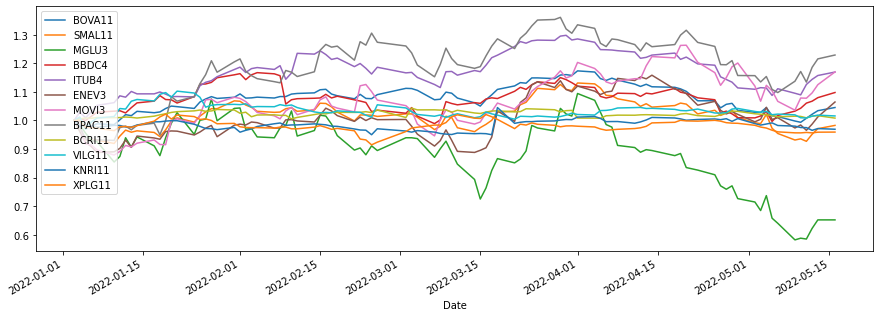

In [48]:
# NORMALIZAÇÃO -> Dividir todos os valores da coluna pelo valor da primeira linha destas:
carteira_norm = cotacoes_carteira / cotacoes_carteira.iloc[0] # Primeira linha com dados numericos
carteira_norm.plot(figsize=(15,5))
# LOCALIZAÇÃO DAS LEGENDAS:
plt.legend(loc='upper left')
plt.show()

# Resultado da normalização -> Todos os valores do gráfico estão partindo de 1

### Vamos puxar o IBOV para comparar

In [49]:
cotacoes_ibo = web.DataReader('^BVSP', data_source='yahoo', start='2022-01-02', end='2022-05-17')
display(cotacoes_ibo)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-03,106125,103413,104823,103922,11128500,103922
2022-01-04,104276,103096,103922,103514,11491600,103514
2022-01-05,103514,100850,103514,101006,0,101006
2022-01-06,102235,101000,101006,101561,11749200,101561
2022-01-07,102719,101104,101561,102719,11733200,102719
...,...,...,...,...,...,...
2022-05-11,105374,103008,103110,104397,13425100,104397
2022-05-12,105708,103579,104395,105688,13995600,105688
2022-05-13,107773,105691,105691,106924,12369300,106924


### Criando um dataframe da Carteira com as quantidades de ações

In [58]:
# Multiplicaremos o valor a ação de cada empresa (EX: BOVA11), pela quantidade de ações
#..coluna QTD do arquivo XLSX ...

valor_investido = pd.DataFrame()

# Percorrendo o XLSX -> For Item em XLSX na coluna 'Ativos'
#..e pega todos os valores da coluna 'Qtde' Inerentes á coluna 'Ativos'.
for ativo in carteira['Ativos']:                       #Localizar em XLSX[Coluna]== Item_Percorrido Item sendo Percorrido.filtrar[0]
    valor_investido[ativo] = cotacoes_carteira[ativo] * carteira.loc[carteira['Ativos']==ativo, 'Qtde'].values[0]

display(valor_investido)
                      
                      
# EXEMPLO DE COMO PEGAR OS VALORES DAS COLUNAS Referenciando pelos nomes das linhas:
#.. sintaxe + == 'Linha', 'Coluna'
#print(carteira.loc[carteira['Ativos']=='MGLU3', 'Qtde'])  

# Exibiu o numero da linha & Valor da Coluna Qtde


# PARA FILTRAR ou PEGAR SOMENTE O VALOR DA COLUNA 'Qtde' , Usamos o Values:
#print(carteira.loc[carteira['Ativos']=='MGLU3', 'Qtde'].values[0])

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,
2022-01-03,9993.000031,10955.000305,6719.999790,1779.996681,2142.411423,4031.999874,1458.342552,1996.242905,10568.947601,9650.787354,13525.672913,9831.997681
2022-01-04,9956.999969,10700.000000,6610.000134,1791.667175,2203.167915,3872.999954,1435.391617,1950.603104,10623.300171,9762.013245,13246.070862,9816.213226
2022-01-05,9709.999847,10216.999817,6420.000076,1778.998947,2161.335754,3719.999886,1337.849903,1866.268730,10652.946472,9350.876617,13258.912659,9589.305115
2022-01-06,9784.999847,10183.000183,6250.000000,1804.335594,2205.159950,3663.000011,1333.068562,1845.999908,10643.064117,9588.223267,13230.262756,9584.372711
2022-01-07,9869.999695,10194.999695,6219.999790,1830.577469,2253.964233,3579.000092,1307.248688,1860.000038,10671.722412,9725.268555,13192.718506,9561.681366
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-10,9923.999786,10244.999695,3950.000048,1854.999924,2332.999992,3966.000080,1572.000027,2337.000084,10712.999725,9736.000061,13183.999634,9400.000000
2022-05-11,10063.999939,10150.000000,3930.000067,1887.000084,2411.000061,3891.000080,1571.000004,2262.999916,10659.999847,9730.000305,13180.000305,9415.000153
2022-05-12,10204.000092,10419.999695,4179.999828,1898.999977,2448.999977,3978.000069,1597.999954,2365.999985,10725.000000,9790.000153,13052.000427,9400.000000


### Comparação Carteira x IBOV

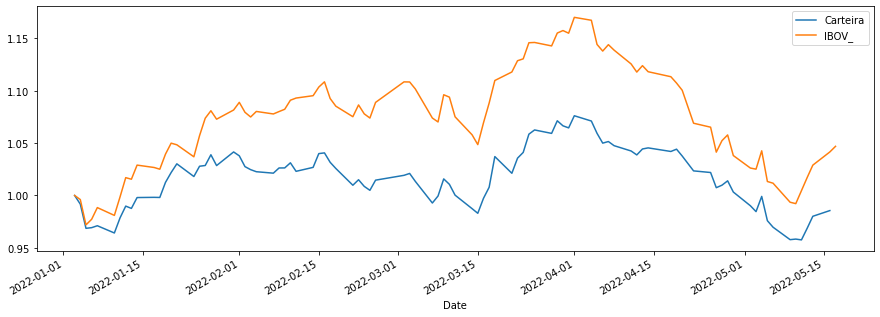

In [66]:
# MOSTRA O QUANTO RENDEU (TODAS AS CARTEIRAS SOMADAS) DESDE O INICIO ATÉ O ULTIMO MÊS:
#..E COMPARA NOSSA CARTEIRA COM A DO IBOVESPA

valor_investido_norm = valor_investido / valor_investido.iloc[0]
cotacoes_ibo_norm = cotacoes_ibo / cotacoes_ibo.iloc[0]

# Este DataFrame (valor_investido) possui o Calculo das ações multiplicados pela coluna 'Qtd' do XLSX:
#Criamos uma coluna 'Total' para guardar os valores somados
valor_investido['Total'] = valor_investido.sum(axis=1)# axis=1 -> Somar Linhas
#display(valor_investido) # mOSTRA cOLUNA tOTAL

valor_investido_norm['Total'].plot(figsize=(15,5),label='Carteira')
# Sobreponto um tegundo gŕafico no primeiro:
cotacoes_ibo_norm['Adj Close'].plot(label='IBOV_')
plt.legend()
plt.show()

In [68]:
# RETORNO == ULTIMO VALOR DIVIDIDO PELO PRIMEIRO -1
retorno_carteira = valor_investido['Total'][-1] / valor_investido['Total'][0] - 1
retorno_ibovespa = cotacoes_ibo['Adj Close'][-1] / cotacoes_ibo['Adj Close'][0] - 1
print(f'Retorno Da Carteira: {retorno_carteira:.2%}\nRetorno Ibovespa: {retorno_ibovespa:.2%}')

Retorno Da Carteira: -1.44%
Retorno Ibovespa: 4.68%


### Correlação da Carteira com o IBOV

In [76]:
correlacao = valor_investido['Total'].corr(cotacoes_ibo['Adj Close']) 
print(f'{correlacao}')

0.9144787963827131
